__All the functions needed to run the neural net__

In [1]:
## activation function
def act_func(a, switch_ = 2):
    if switch_ == 1: # linear activation
        g = a
    elif switch_ == 2: # sigmoid activation
        g = 1.0 / (1.0 + np.exp(-1.0 * a))
    elif switch_ == 3: # tanh() activation
        g = np.tanh(a)
    return g

## neural net itself
def neur_net(x, w_list, b, num_lay):
    h_list = []
    # set input as the first layer ([1, N])
    h = x
    h_list.append(h)
    #### for each layer ([1, N+H])
    for lay in range(num_lay-1):
        # neuron pre-activation
        a = b[lay] + np.dot(w_list[lay].T, h)

        # activation function for layer 1
        h = act_func(a)
        h_list.append(h)

    #pre-activation for output layer  (N+H+1)
    lay = num_lay-1
    a_out = b[lay] + np.dot(w_list[lay].T, h)

    # activation function for output layer
    f = act_func(a_out)
    h_list.append(f)
    return f, h_list

# initialize weights in the correct shape
def init_weights(num_neur_per_lay):
    w_list = []
#     np.random.seed(1)
    for i in range(len(num_neur_per_lay)-1):
    # initialize the weights so that they're in the right format
        w = 2 * np.random.random((num_neur_per_lay[i], num_neur_per_lay[i+1])) - 1
        w_list.append(w)
#     print(w_list)
    return w_list

# activation function
def der_act_func(x, switch_ = 2):
    if switch_ == 1: # linear activation
        g = 1
    elif switch_ == 2: # sigmoid activation
        g =  x * (1.0-x)
    #### TO-DO
#     elif switch_ == 3: # tanh() activation
#         g = np.tanh(a)
    return g

# update the weights
def update_w(error, outp, inp, weight, alpha):
    # calculate the error in output, this on its own goes for bias correction
    del_out = error * der_act_func(outp)
    # mulitply it by the input, this comes from the partial derivate wrt the weights
    del_w = np.dot(inp, del_out.T)
    # calculate error that we're going to propagate to the previous layer
    prev_err = np.dot(weight, del_out )
    return weight + alpha * del_w, prev_err, del_out # update

# initialize the biases
def init_bias(num_neur_per_lay, nonzeros=False):
    b_list = []
    np.random.seed(1)
    for i in range(len(num_neur_per_lay)-1):
    # initialize the weights so that they're in the right format
        if nonzeros:
            w = 2 * np.random.random((num_neur_per_lay[i+1],1)) - 1
            b_list.append(w)
        else:
            w = 2 * np.zeros((num_neur_per_lay[i+1],1)) - 1
            b_list.append(w)     
    return b_list

# softmax for the output layer (not yet used)
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

__Load input and label__

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
# import NeuralNets

x = np.array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]]).T
y = np.array([[0,0],[1,0],[1,0],[0,0]]).T
print(np.shape(x))
print(np.shape(y))

X = mnist.train.images#[0:10000]
Y = mnist.train.labels#[0:10000]
bool_0 = (Y == np.array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])).all(1)
bool_1 = (Y == np.array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])).all(1)
bool_2 = (Y == np.array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])).all(1)
bool_3 = (Y == np.array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])).all(1)
bool_4 = (Y == np.array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])).all(1)
bool_5 = (Y == np.array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])).all(1)
bool_6 = (Y == np.array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]])).all(1)
bool_7 = (Y == np.array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])).all(1)
bool_8 = (Y == np.array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])).all(1)
bool_9 = (Y == np.array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])).all(1)
bool_ = (bool_0 | bool_1 | bool_2 | bool_3 | bool_4)

# x_train, x_test, y_train, y_test = train_test_split(X[bool_], Y[bool_], test_size=0.33, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


###### SUPER important to have them in the right format/dimension
x_train = x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T
# print(x_train)
# print(y_train)
print(np.shape(x_train))
print(np.shape(y_train))
# print(X.T)
# print(Y.T)
print(np.shape(X[bool_]))
print(np.shape(Y[bool_]))
# print(len(mnist.train.labels))

(3, 4)
(2, 4)
(784, 36850)
(10, 36850)
(28038, 784)
(28038, 10)


(28, 28)


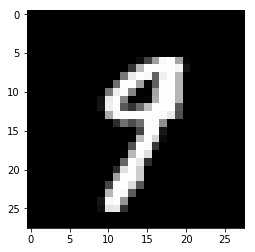

In [4]:
# just plot one
import matplotlib.pyplot as plt
# print(x_train.T[0])
print(np.shape(x_train.T[0].reshape(28,28)))
plt.imshow(x_train.T[0].reshape(28,28), cmap='gray')
plt.show()



__Initialize weights and biases__

In [6]:
num_inputs = int(x_train.shape[0])
num_outputs = y_train.shape[0]
print(num_outputs)
###### modify this if you want to have more layer or change the #of nodes per layer
num_neur_per_lay = np.array([num_inputs,300,num_outputs])
## e.g. num_neur_per_lay = np.array([num_inputs,300,100,num_outputs]), 
## gives you 2 hidden layer with 300 nodes in the first one and 100 in the second one

print 'Number of nodes per layers. First layer is the input, last is the output '
print num_neur_per_lay
num_lay = len(num_neur_per_lay)-1

# initialize weights based on input and output format
w_list = init_weights(num_neur_per_lay)
# initialize biases based on input and output format
b = init_bias(num_neur_per_lay)

10
Number of nodes per layers. First layer is the input, last is the output 
[784 300  10]


In [8]:
### TO-DO work on this one to do the log-likelihood instead
def error_func(output, y_label, is_squared=True):
    if is_squared:
        error = y_label - output 
    else:
        error = np.divide(y_label, output)
    return error

# log-likelihood (also called cross-entropy
# error function)
# y*log(o)
# y/o*do/dw
# y/o*o*(1-o)*dz/dw
# y*(1-o)*dz/dw

# sum squared error function)
# 1/2*(y-o)^2
# -(y-o)*do/dw
# -(y-o)*o*(1-o)*dz/dw
# (y-o)*o*(1-o)*dz/dw
# out_err = error_func(y_train, o, True)
# print(out_err)
# out_err = error_func(o, y_train, True)
# test_out_err = (o_test, y_test, True)
# print(np.shape(y_train - o ))
# print(out_err.shape)
# ((y_train - o ) == out_err).all()
# print(test_out_err.shape)
# print(y_label)

In [10]:
# # # initialize weights and biases if you want to restart
# w_list = init_weights(num_neur_per_lay)
# #bias
# b = init_bias(num_neur_per_lay )
print('Before')
print(num_neur_per_lay)
# print(w_list)
# print(b)
[np.shape(w_) for w_ in w_list]

alpha = 0.00001

N_epoch = 1000

# Feed example through network to compute output with random weights
o, h_list = neur_net(x_train, w_list, b, num_lay)

# For the output layer, compute the error and correction
out_err = (y_train-o)

print 'Training error = '+str(np.mean(np.abs(out_err)))
print 'Training accuracy = '+str(sum(np.argmax(o,0) == np.argmax(y_train,0)) / float(np.shape(o)[1]))

for i in range(N_epoch):

    new_weight, prev_err, del_b = update_w(out_err, h_list[-1], h_list[-2], w_list[-1], alpha)
    # update weight for output layer
    w_list[-1] = new_weight
    # update bias for output layer
    b[-1] = b[-1] + alpha * np.mean(del_b,1,keepdims=True)
    
    # For the hidden layers, compute the error and correction
    for j in range(num_lay-1):
        new_weight, prev_err, del_b = update_w(prev_err, h_list[-2-j], h_list[-3-j], w_list[-2-j], alpha)
        # update weight for hidden layer
        w_list[-2-j] = new_weight
        # update bias for hidden layers
        b[-2-j] = b[-2-j] + alpha * np.mean(del_b,1,keepdims=True)
        
    # Feed example through network to compute output with updated weights
    o, h_list = neur_net(x_train, w_list, b, num_lay)
    
    # For the output layer, compute the error and correction with updated weights
    out_err = error_func(o, y_train, True)
#     out_err = (y_train - o)
    
    
    if (i% 5) == 0:
        # neural net on test set
        o_test, h_list_test = neur_net(x_test, w_list, b, num_lay)

        # test error
        test_out_err = error_func(o_test, y_test, True)
        
        print 'After '+ str(i)+' out of ' + str(N_epoch) + ' backprop. Training error = '+str(np.mean(np.abs(out_err)))+\
            ', test error = ' + str(np.mean(np.abs(test_out_err)))
        print 'Training accuracy = '+str(sum(np.argmax(o,0) == np.argmax(y_train,0)) / float(np.shape(o)[1]))+\
            ', test accuracy = ' + str(sum(np.argmax(o_test,0) == np.argmax(y_test,0)) / float(np.shape(o_test)[1]))

# print(w_list)
# print(b)
# print(x)
# [np.shape(w_) for w_ in w_list]
# print(o_test[:,3])
# print(np.argmax(o_test[:,3],0))
# print(y_test[:,3])
# print(np.argmax(y_test[:,3],0))


 Before
[784 300  10]
Training error = 0.440704364288
Training accuracy = 0.118181818182
After 0 out of 1000 backprop. Training error = 0.36523388178, test error = 0.365240030546
Training accuracy = 0.118398914518, test accuracy = 0.119008264463
After 5 out of 1000 backprop. Training error = 0.177449785092, test error = 0.17699893846
Training accuracy = 0.12803256445, test accuracy = 0.126666666667
After 10 out of 1000 backprop. Training error = 0.135586485039, test error = 0.135106195353
Training accuracy = 0.13986431479, test accuracy = 0.137741046832
After 15 out of 1000 backprop. Training error = 0.123725221447, test error = 0.123259729061
Training accuracy = 0.150122116689, test accuracy = 0.146776859504
After 20 out of 1000 backprop. Training error = 0.118145116648, test error = 0.117713099542
Training accuracy = 0.158344640434, test accuracy = 0.154435261708


KeyboardInterrupt: 

I've run 1000 nodes and it reached 75% accuracy, but again, this is with squared error, not log-likelihood yet. That should be better for sure.

__Not needed__

In [31]:
print 'new output [1, 0, 0]'
o, h_list = neur_net(np.array([[1,0,0]]).T, w_list, b, num_lay)
print 'Result' + str(o)

new output [1, 0, 0]
Result[[ 0.99986946]
 [ 0.17011654]]


In [32]:
out_err = (y-o)
print(out_err)
# np.mean(
print(np.abs(out_err))
print(np.mean(np.abs(out_err)))


[[-0.00922196  0.00777619  0.00653753 -0.0077548 ]
 [-0.00541096 -0.00078916 -0.00237167 -0.00180415]]
[[ 0.00922196  0.00777619  0.00653753  0.0077548 ]
 [ 0.00541096  0.00078916  0.00237167  0.00180415]]
0.00520830384613


In [102]:
# np.mean(np.abs(test_out_err))

0.10000000000000001

In [130]:
print(y_test==o_test)

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


In [210]:
np.argmax(o_test[:,:3],0)

array([0, 0, 0])

In [205]:
np.shape(np.argmax(o_test,0))

(18150,)

In [165]:
sum(np.argmax(o_test,0) == np.argmax(y_test,0)) / np.shape(o_test)[1]

0

In [208]:
np.argmax(o_test,0)

array([0, 0, 0, ..., 0, 0, 0])

In [207]:
np.argmax(y_test,0)

array([8, 5, 5, ..., 2, 4, 9])

In [331]:
# print(o_test[:,:4])
print(-np.log(softmax(o_test[:,:4])))
print(np.argmax(softmax(o_test[:,:4]),0))
print(y_test[:,:4])
print(np.argmax(y_test[:,:4],0))
np.argmax(o_test[:,:4],0)

[[ 2.84744453  2.84744453  2.84744453  2.84744453]
 [ 3.84744453  3.84744453  3.84744453  3.84744453]
 [ 3.84744453  3.84744453  3.84744453  3.84744453]
 [ 3.84744453  3.84744453  3.84744453  3.84744453]
 [ 3.84744453  3.84744453  3.84744453  3.84744453]
 [ 3.84744453  3.84744453  3.84744453  3.84744453]
 [ 3.84744453  3.84744453  3.84744453  3.84744453]
 [ 3.84744453  3.84744453  3.84744453  3.84744453]
 [ 3.84744453  3.84744453  3.84744453  3.84744453]
 [ 3.84744453  3.84744453  3.84744453  3.84744453]]
[0 0 0 0]
[[ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[2 2 0 2]


array([0, 0, 0, 0])